In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [24]:
def run_main():
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    
    while(True):
        ret, frame = cap.read()
        roi = frame[0:500, 0:500]
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
        thresh = cv.adaptiveThreshold(gray_blur, 255,
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 5, 1)
        kernel = np.ones((3,3), np.float64)
        closing = cv2.morphologyEx(thresh,
                                  cv2.MORPH_CLOSE,
                                  kernel, iterations=4)
        cont_img = closing.copy()
        contours, hierarchy = cv2.findContours(cont_img,
                                              cv2.RETR_EXTERNAL,
                                              cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            area = cv2.contourAREA(cnt)
            if area < 2000 or area > 5000:
                continue
                
            if len(cnt) < 5:
                continue
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(roi, ellipse, (0,255,0),2)
        
        cv2.imshow("Morphological Closing", closing)
        cv2.imshow("Adaptive Thresholding", thresh)
        cv2.imshow('Contours', roi)
        
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

In [25]:
if __name__ == "__main__":
    run_main()

TypeError: 'NoneType' object is not subscriptable

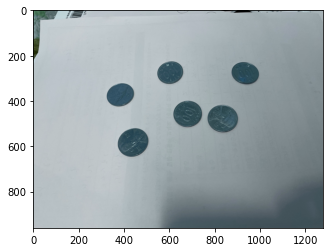

In [26]:
img = cv2.imread('acc.jpg',1)
plt.imshow(img)
plt.show()